In [226]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/maxdokukin/Politician-Trades/main/Data/data/transactions_cleaned.csv')
df

,Politician Name,Party,Chamber,State,Issuer Name,Ticker,Publication Date,Transaction Date,Reporting Gap,Owner,Transaction Type,Value Range,Price,Transaction ID,Price_0_days,Approx Transaction Amount,Approx Share Count
0,Tom Carper,Democrat,Senate,DE,Valero Energy Corp,VLO,2024-05-01,2024-04-11,19,Spouse,SELL,1K–15K,177.04,10000062280,177.039993,8000.0,45.0
1,Tom Carper,Democrat,Senate,DE,Enbridge Inc,ENB,2024-05-01,2024-04-11,19,Spouse,BUY,1K–15K,34.55,10000062281,34.549999,8000.0,231.0
2,Dan Newhouse,Republican,House,WA,Accenture PLC,ACN,2024-04-26,2024-04-10,15,Spouse,BUY,1K–15K,324.40,20003772725,324.399994,8000.0,24.0
3,Dan Newhouse,Republican,House,WA,Analog Devices Inc,ADI,2024-04-26,2024-04-10,15,Spouse,BUY,1K–15K,196.33,20003772726,196.330002,8000.0,40.0
4,Dan Newhouse,Republican,House,WA,Booking Holdings Inc,BKNG,2024-04-26,2024-04-10,15,Spouse,SELL,1K–15K,3586.13,20003772728,3586.129883,8000.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31584,Alan Lowenthal,Democrat,House,CA,Americold Realty Trust,COLD,2021-03-24,2021-03-15,8,Spouse,SELL,15K–50K,37.13,20001621840,37.130001,32500.0,875.0
31585,Mark Green,Republican,House,TN,NGL Energy Partners LP,NGL,2021-03-21,2021-03-17,3,Undisclosed,BUY,15K–50K,2.34,20001620394,2.340000,32500.0,13888.0
31586,Doug Lamborn,Republican,House,CO,NetApp Inc,NTAP,2021-03-20,2021-03-19,0,Spouse,SELL,15K–50K,70.16,20001621844,70.160004,32500.0,463.0
31587,Doug Lamborn,Republican,House,CO,NetApp Inc,NTAP,2021-03-20,2021-03-19,0,Undisclosed,SELL,1K–15K,70.16,20001621847,70.160004,8000.0,114.0


In [227]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df['Publication Date'] = pd.to_datetime(df['Publication Date'])

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Helvetica'

<ipython-input-229-69f370f69a5c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=data, y='Issuer Name', x='count', palette=['#1B4242'])
<ipython-input-229-69f370f69a5c>:7: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=data, y='Issuer Name', x='count', palette=['#1B4242'])


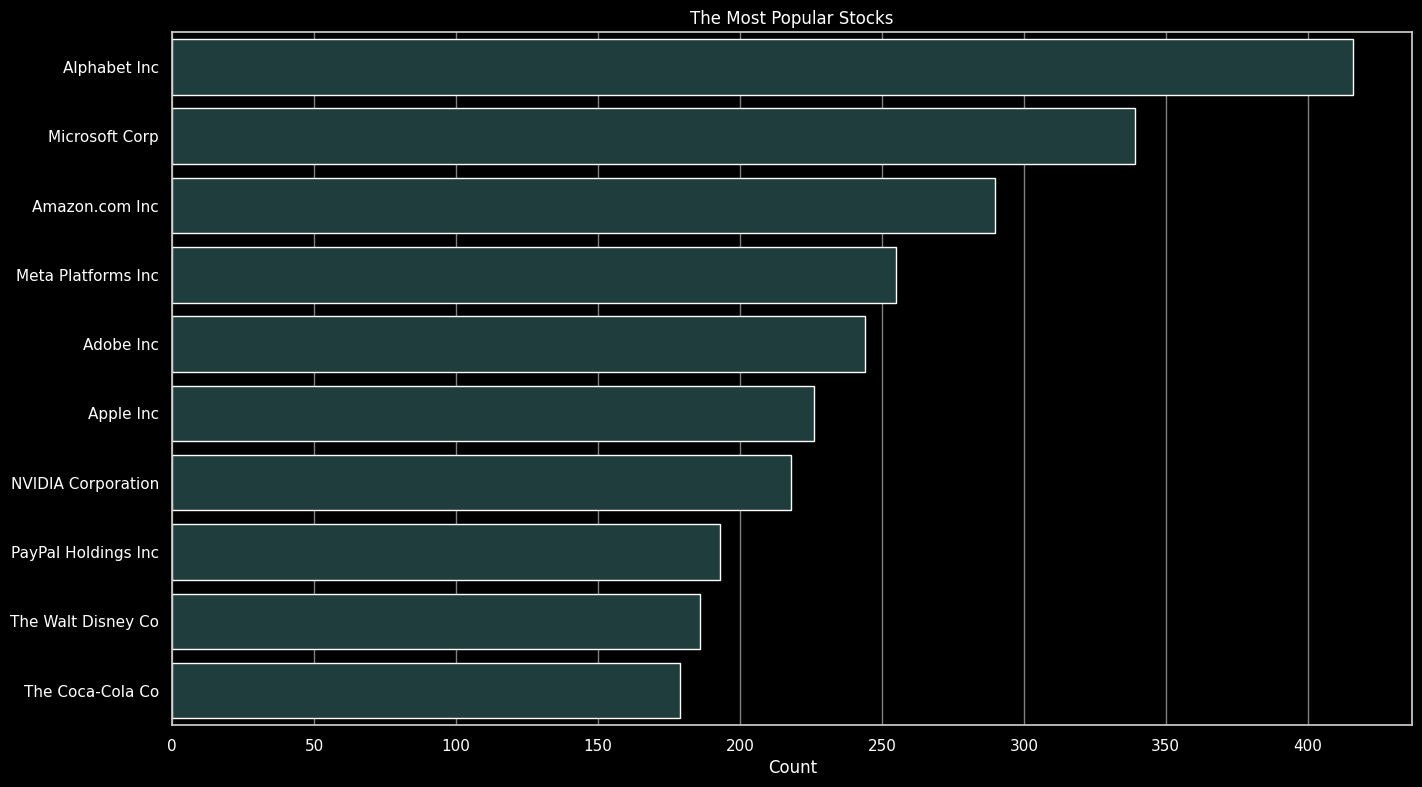

In [229]:
data = df['Issuer Name'].value_counts().head(10).reset_index()
data.columns = ['Issuer Name', 'count']

plt.figure(figsize=(16, 9), facecolor='black')
sns.set(style="whitegrid", rc={"axes.facecolor": "black", "grid.color": "gray"})

ax = sns.barplot(data=data, y='Issuer Name', x='count', palette=['#1B4242'])
ax.set_facecolor('black')
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('Count', color='white')
plt.ylabel('', color='white')
plt.title('The Most Popular Stocks', color='white')

plt.show()

Text(0.5, 1.0, 'Trades Volume by Party')

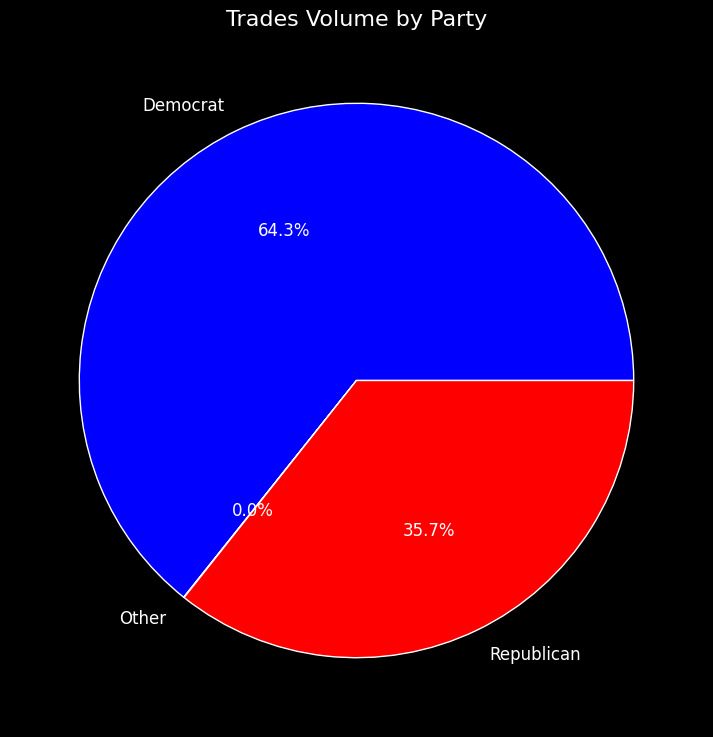

In [230]:
party_counts = df.groupby('Party')['Politician Name'].count()

plt.figure(figsize=(16, 9), facecolor='black')

plt.pie(party_counts,
        labels=party_counts.index,
        autopct='%1.1f%%',
        colors=['blue', 'gray', 'red'],
        textprops={'fontsize': 12, 'color': 'white'})


plt.title('Trades Volume by Party', color='white', fontsize=16)

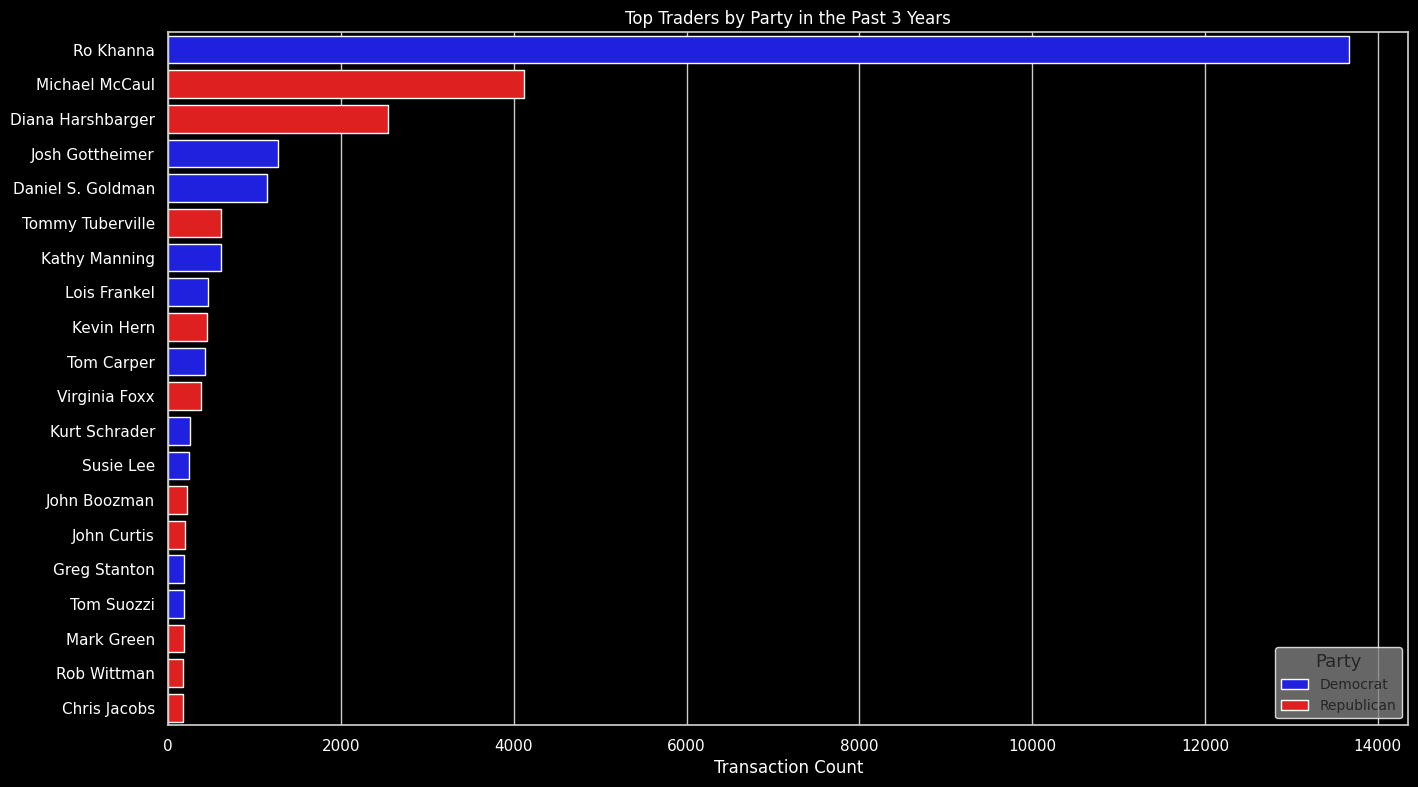

In [231]:
trades_byname = df.groupby('Politician Name')['Party'].count().sort_values(ascending=False).reset_index()
trades_byname.columns = ['Politician Name', 'Transaction Count']
trades_byname = trades_byname.merge(df[['Politician Name', 'Party']].drop_duplicates(), on='Politician Name')

plt.figure(figsize=(16, 9), facecolor='black')
sns.set(style="whitegrid", rc={"axes.facecolor": "black"})
ax = sns.barplot(data=trades_byname.sort_values('Transaction Count', ascending=False).head(20),
            y='Politician Name',
            x='Transaction Count',
            hue='Party',
            palette=['blue', 'red'])

ax.set_facecolor('black')
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('Transaction Count', color='white')
plt.ylabel('', color='white')
plt.title('Top Traders by Party in the Past 3 Years', color='white')
plt.legend(title='Party', title_fontsize='13', loc='lower left', bbox_to_anchor=(0.887, 0), frameon=True, facecolor='grey', edgecolor='white', fontsize='10')

plt.show()

In [232]:
# https://www.youtube.com/shorts/Rx0TaH6Bx48

Text(0.5, 1.0, 'Trades Volume by Party')

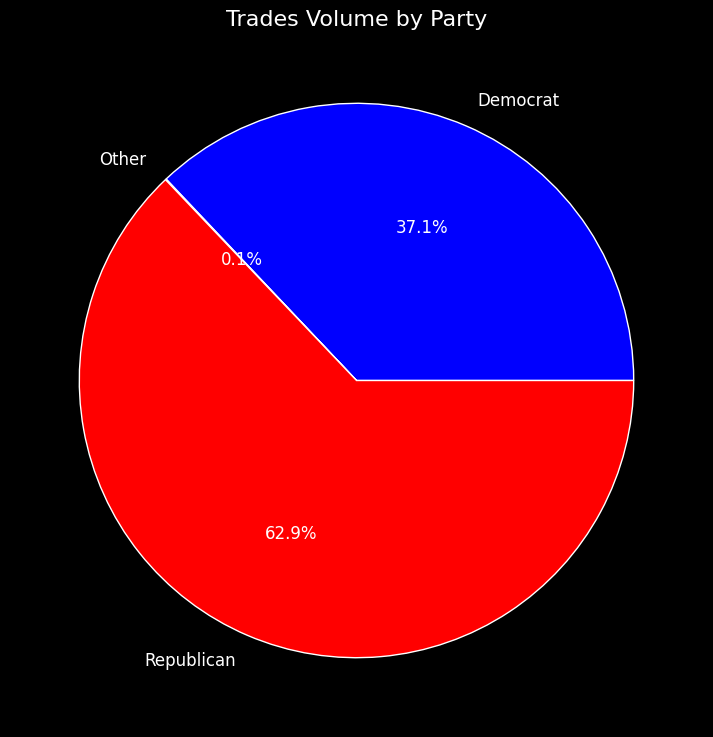

In [233]:
party_counts = df[df['Politician Name'] != 'Ro Khanna'].groupby('Party')['Politician Name'].count()

plt.figure(figsize=(16, 9), facecolor='black')

plt.pie(party_counts,
        labels=party_counts.index,
        autopct='%1.1f%%',
        colors=['blue', 'gray', 'red'],
        textprops={'fontsize': 12, 'color': 'white'})

plt.title('Trades Volume by Party', color='white', fontsize=16)

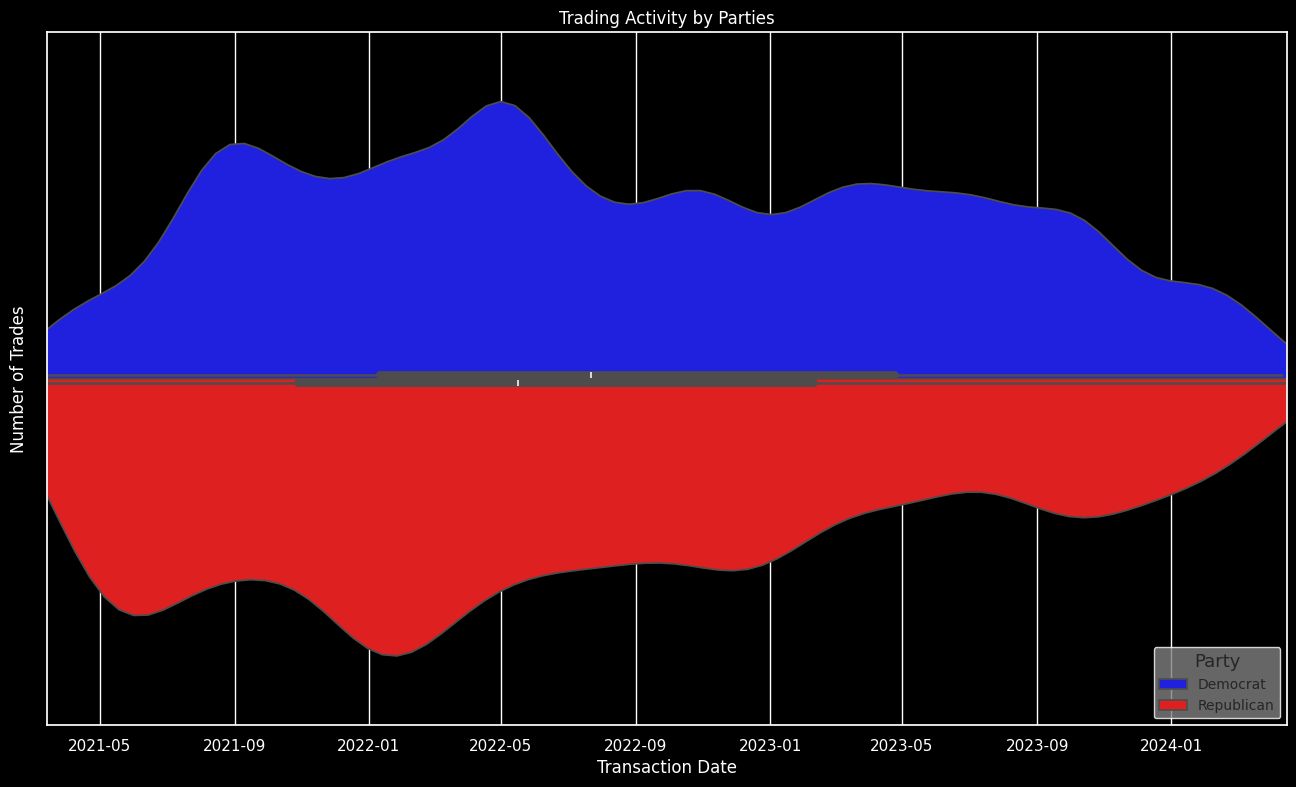

In [234]:
plt.figure(figsize=(16, 9), facecolor='black')
sns.set(style="darkgrid", rc={"axes.facecolor": ".9"})

ax = sns.violinplot(data=df[df.Party != 'Other'],
               x='Transaction Date',
               hue='Party',
               palette = ['blue', 'red'],
               split=True)

ax.set_facecolor('black')
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('Transaction Date', color='white')
plt.ylabel('Number of Trades', color='white')

plt.title('Trading Activity by Parties', color='white')
plt.legend(title='Party', title_fontsize='13', loc='lower left', bbox_to_anchor=(0.887, 0), frameon=True, facecolor='grey', edgecolor='white', fontsize='10')

ax.set_xlim(df['Transaction Date'].min(), df['Transaction Date'].max())

plt.show()

Text(0.5, 1.0, 'Trades Volume by Chamber')

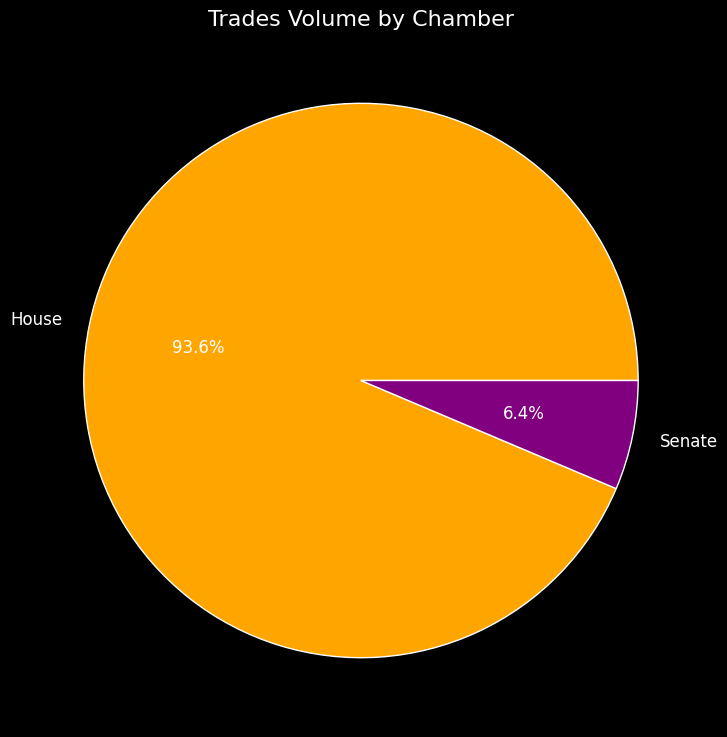

In [235]:
party_counts = df.groupby('Chamber')['Politician Name'].count()

plt.figure(figsize=(16, 9), facecolor='black')

plt.pie(party_counts,
        labels=party_counts.index,
        autopct='%1.1f%%',
        colors=['orange', 'purple'],
        textprops={'fontsize': 12, 'color': 'white'})


plt.title('Trades Volume by Chamber', color='white', fontsize=16)

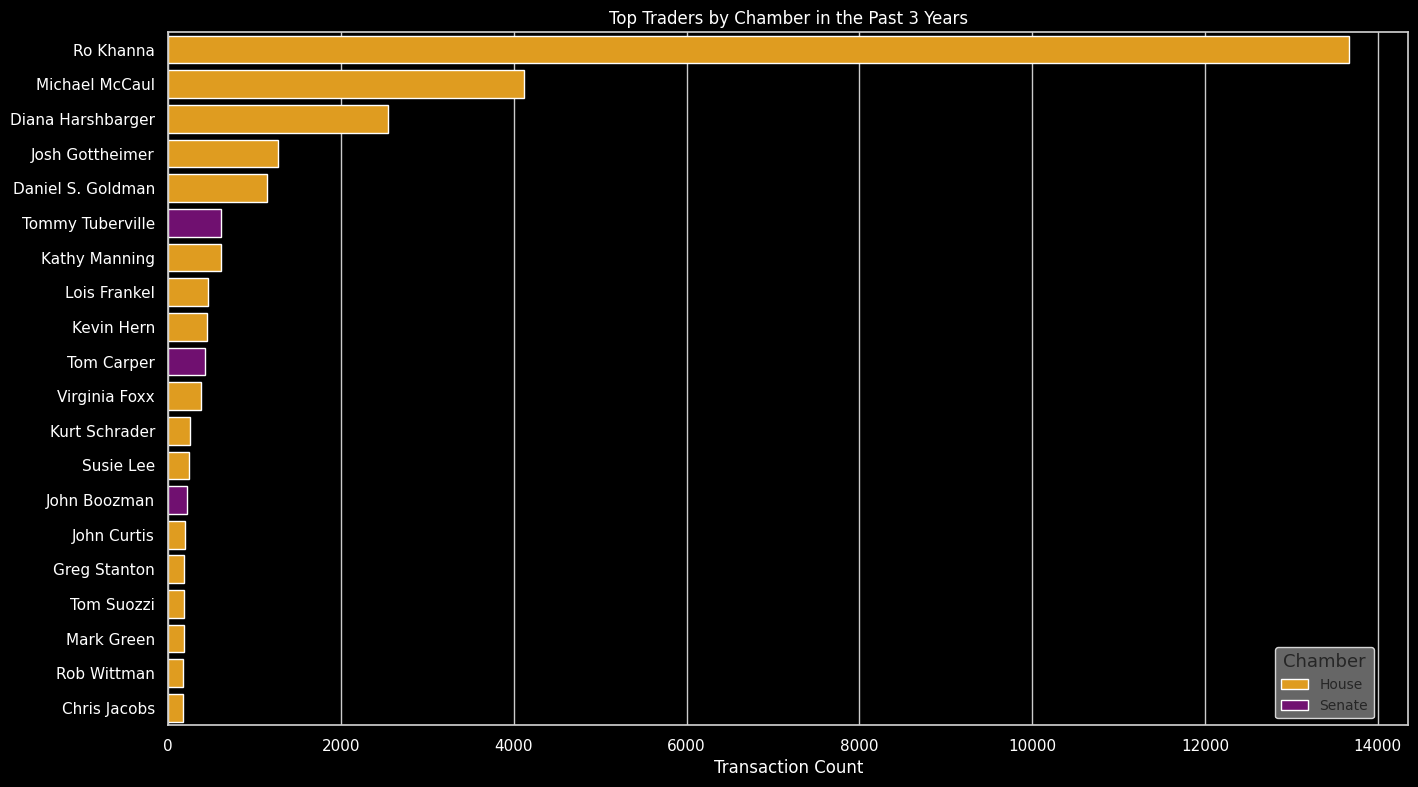

In [236]:
trades_byname = df.groupby('Politician Name')['Chamber'].count().sort_values(ascending=False).reset_index()
trades_byname.columns = ['Politician Name', 'Transaction Count']
trades_byname = trades_byname.merge(df[['Politician Name', 'Chamber']].drop_duplicates(), on='Politician Name')

plt.figure(figsize=(16, 9), facecolor='black')
sns.set(style="whitegrid", rc={"axes.facecolor": "black"})
ax = sns.barplot(data=trades_byname.sort_values('Transaction Count', ascending=False).head(20),
            y='Politician Name',
            x='Transaction Count',
            hue='Chamber',
            palette=['orange', 'purple'])

ax.set_facecolor('black')
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('Transaction Count', color='white')
plt.ylabel('', color='white')
plt.title('Top Traders by Chamber in the Past 3 Years', color='white')
plt.legend(title='Chamber', title_fontsize='13', loc='lower left', bbox_to_anchor=(0.887, 0), frameon=True, facecolor='grey', edgecolor='white', fontsize='10')

plt.show()

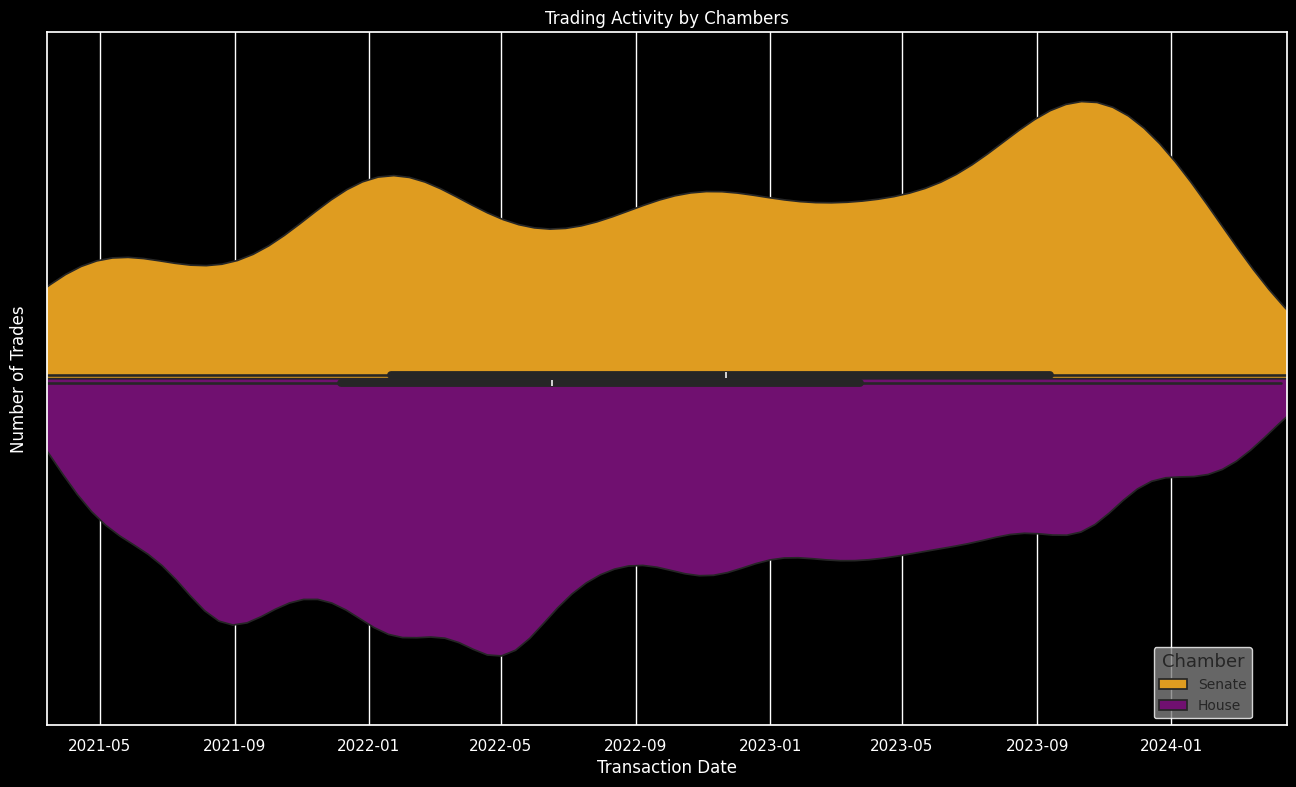

In [237]:
plt.figure(figsize=(16, 9), facecolor='black')
sns.set(style="darkgrid", rc={"axes.facecolor": ".9"})

ax = sns.violinplot(data=df[df.Party != 'Other'],
               x='Transaction Date',
               hue='Chamber',
               palette = ['orange', 'purple'],
               split=True)

ax.set_facecolor('black')
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('Transaction Date', color='white')
plt.ylabel('Number of Trades', color='white')

plt.title('Trading Activity by Chambers', color='white')
plt.legend(title='Chamber', title_fontsize='13', loc='lower left', bbox_to_anchor=(0.887, 0), frameon=True, facecolor='grey', edgecolor='white', fontsize='10')

ax.set_xlim(df['Transaction Date'].min(), df['Transaction Date'].max())

plt.show()

<ipython-input-238-718aab4363aa>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_states.values, y=top_states.index, palette=['#1B4242'])
<ipython-input-238-718aab4363aa>:6: UserWarning: 
The palette list has fewer values (1) than needed (20) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=top_states.values, y=top_states.index, palette=['#1B4242'])


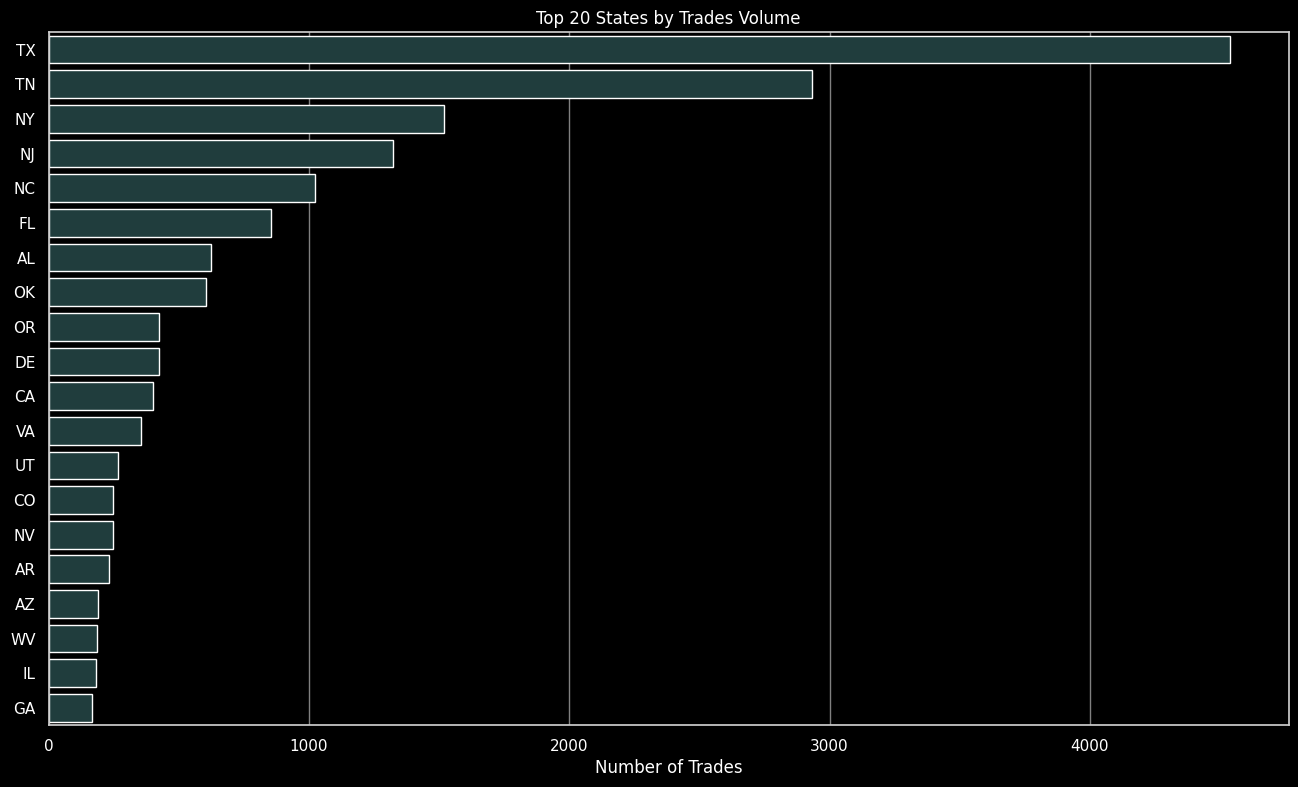

In [238]:
top_states = party_counts = df[df["Politician Name"] != 'Ro Khanna'].groupby('State').size().sort_values(ascending=False).head(20)

plt.figure(figsize=(16, 9), facecolor='black')
sns.set(style="whitegrid", rc={"axes.facecolor": "black", "grid.color": "gray"})

ax = sns.barplot(x=top_states.values, y=top_states.index, palette=['#1B4242'])

ax.set_xlabel('Number of Trades', color='white')
ax.set_ylabel('', color='white')
ax.set_title('Top 20 States by Trades Volume', color='white')
plt.xticks(color='white')
plt.yticks(color='white')

plt.show()

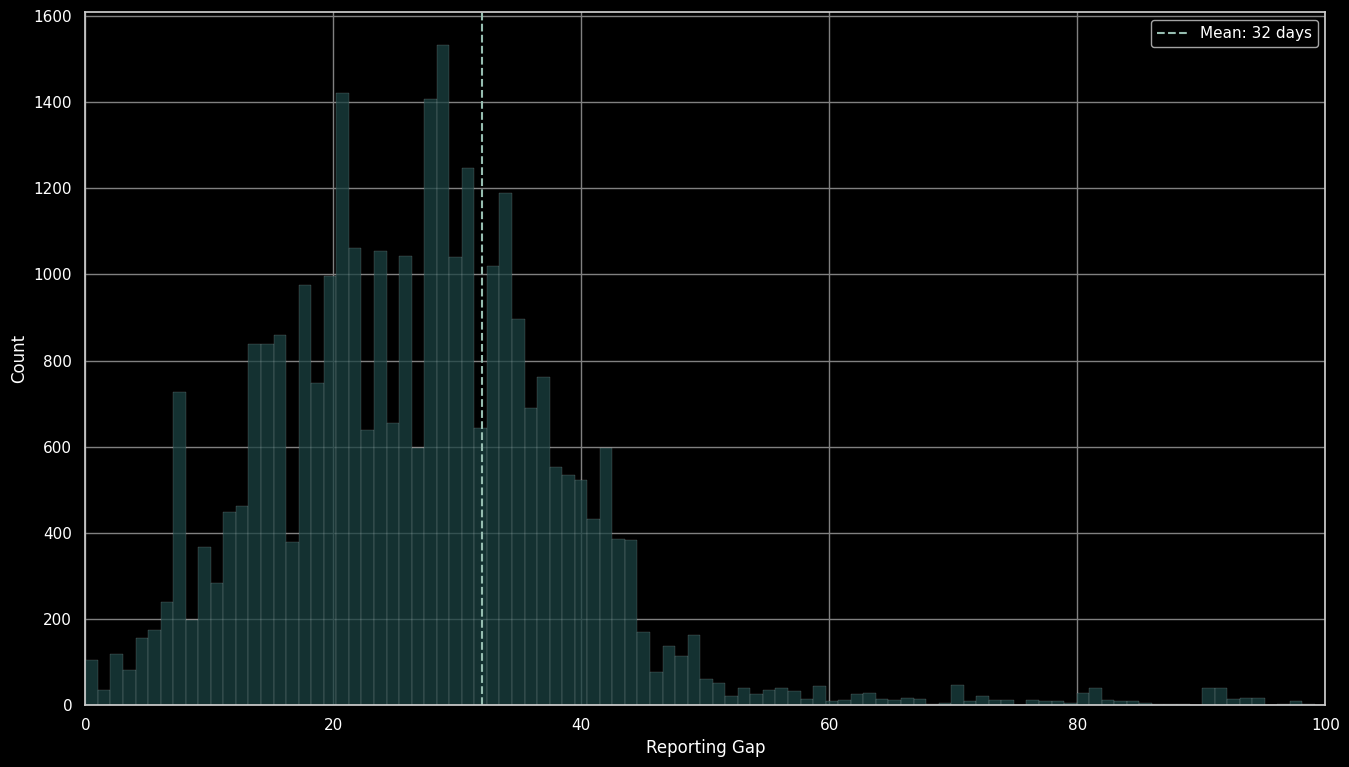

In [239]:
plt.figure(figsize=(16, 9), facecolor='black')
ax = sns.histplot(df['Reporting Gap'], kde=False, color='#1B4242')
ax.set_facecolor('black')
ax.set_xlim(0, 100)
mean_val = df['Reporting Gap'].mean()
ax.axvline(mean_val, color='#96BDB0', linestyle='--', label=f'Mean: {mean_val:.0f} days')
ax.tick_params(colors='white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')
legend = ax.legend()
plt.setp(legend.get_texts(), color='white')
plt.show()